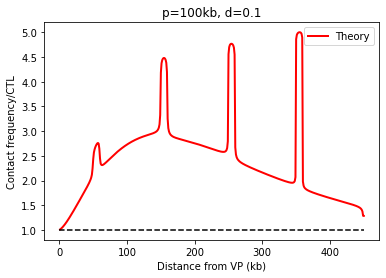

In [8]:
import numpy as np
import matplotlib.pyplot as plt

L = 450              #length of the chromosome in kb
gamma = 1.5          #gamma exponent
p = 100              #processivity of loop extuder in kb
d = 0.10             #density of bounded extruders

l1 = 50              #block site 1 in kb
dl1 = 10             #block domain 1 in kb
l2 = 150             #block site 2 in kb
dl2 = 10             #block domain 2 in kb
l3 = 250             #block site 3 in kb
dl3 = 10             #block domain 3 in kb
l4 = 350             #block site 4 in kb
dl4 = 10             #block domain 4 in kb

a1 = 0.05            #density block site 1
a2 = 0.05            #density block site 2
a3 = 0.05            #density block site 3
a4 = 0.05            #density block site 4

s = np.arange(1,L+1)
cont = np.zeros((L,2))
conts0 =np.zeros(L)
for i in range(L):
    l = np.arange(s[i])
    conts01 = sum(np.exp(-l/p)/((s[i]-l)**gamma)/p)
    l = np.arange(s[i]+1,L)
    conts02 = sum(np.exp(-l/p)/((s[i]*(l-s[i])/l)**gamma)/p)
    conts0[i] = conts01+conts02
    cont[i,1] = 1/(s[i]**gamma)

conts1 =np.zeros((dl1,L))
for k1 in range(dl1):
    L11 = l1+k1
    for i in range(L):
        if (s[i]<L11):
            conts1[k1,i] = conts0[i] + np.exp(-L11/p)/((s[i]*(L11-s[i])/L11)**gamma)
        elif(s[i]>L11):
            l = np.arange(L11)
            conts1[k1,i] = sum(np.exp(-l/p)/((s[i]-l)**gamma)/p)
            conts1[k1,i] += np.exp(-L11/p)/((s[i]-L11)**gamma)
        else:
            conts1[k1,i] = 1
conts2 =np.zeros((dl2,L))
for k1 in range(dl2):
    L11 = l2+k1
    for i in range(L):
        if (s[i]<L11):
            conts2[k1,i] = conts0[i] + np.exp(-L11/p)/((s[i]*(L11-s[i])/L11)**gamma)
        elif(s[i]>L11):
            l = np.arange(L11)
            conts2[k1,i] = sum(np.exp(-l/p)/((s[i]-l)**gamma)/p)
            conts2[k1,i] += np.exp(-L11/p)/((s[i]-L11)**gamma)
        else:
            conts2[k1,i] = 1
conts3 =np.zeros((dl3,L))
for k1 in range(dl3):
    L11 = l3+k1
    for i in range(L):
        if (s[i]<L11):
            conts3[k1,i] = conts0[i] + np.exp(-L11/p)/((s[i]*(L11-s[i])/L11)**gamma)
        elif(s[i]>L11):
            l = np.arange(L11)
            conts3[k1,i] = sum(np.exp(-l/p)/((s[i]-l)**gamma)/p)
            conts3[k1,i] += np.exp(-L11/p)/((s[i]-L11)**gamma)
        else:
            conts3[k1,i] = 1


conts4 =np.zeros((dl4,L))
for k1 in range(dl4):
    L11 = l4+k1
    for i in range(L):
        if (s[i]<L11):
            conts4[k1,i] = conts0[i] + np.exp(-L11/p)/((s[i]*(L11-s[i])/L11)**gamma)
        elif(s[i]>L11):
            l = np.arange(L11)
            conts4[k1,i] = sum(np.exp(-l/p)/((s[i]-l)**gamma)/p)
            conts4[k1,i] += np.exp(-L11/p)/((s[i]-L11)**gamma)
        else:
            conts4[k1,i] = 1


pref0 = d*(1-a1)*(1-a2)*(1-a3)*(1-a4)
pref1 = d*a1
pref2 = d*(1-a1)*a2
pref3 = d*(1-a1)*(1-a2)*a3
pref4 = d*(1-a1)*(1-a2)*(1-a3)*a4
prefn = (1-d)
conts0 = pref0*conts0
conts1 = pref1*conts1
conts2 = pref2*conts2
conts3 = pref3*conts3
conts4 = pref4*conts4
contsn = prefn*cont[:,1]
for i in range(L):
    for k1 in range(dl1):
        for k2 in range(dl2):
            for k3 in range(dl3):
                for k4 in range(dl4):
                    cont[i,0]+=conts0[i]+conts1[k1,i]+conts2[k2,i]+conts3[k3,i]+conts4[k4,i]+contsn[i]

plt.plot(s,cont[:,0]/cont[:,1]/dl1/dl2/dl3/dl4,'r-',lw=2,label='Theory')
plt.ylabel('Contact frequency/CTL')                                                        
plt.xlabel('Distance from VP (kb)')
plt.title('p='+str(p)+'kb, d='+str(d))
legend = plt.legend()
plt.plot([0,L],[1,1],'k--')